# Data Wrangling with House Prices

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Load the data
Load the [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) dataset from Kaggle. You may need to download the dataset and move it to your working location in order to read it in.


In [2]:
df = pd.read_csv('housing_train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.shape

(1460, 81)

### Split into X and Y

In [8]:
label = 'SalePrice'
Y = df[label]
X = df.drop(label, axis=1)

In [9]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [10]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


### Pre-Split Dataset Manipulations

In [11]:
# Id is a redundant column and provides no modeling value
X = X.drop('Id', axis=1)

In [12]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Train/Test Split the Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

## Transformers
* Standard Scaling
* Encoding
* Imputation

https://scikit-learn.org/stable/modules/preprocessing.html
https://scikit-learn.org/stable/modules/impute.html

Note: Do not apply transformations before train/test split


#### Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [45]:
from sklearn.datasets import fetch_california_housing

In [46]:
cali = fetch_california_housing()

In [17]:
X_cali = pd.DataFrame(cali.data, columns=cali.feature_names)
y_cali = cali.target

In [533]:
X_cali

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [534]:
from sklearn.linear_model import LinearRegression

In [535]:
reg = LinearRegression().fit(X_cali, y_cali)

In [536]:
reg.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [537]:
print(list(zip(reg.coef_.round(2), cali.feature_names)))

[(0.44, 'MedInc'), (0.01, 'HouseAge'), (-0.11, 'AveRooms'), (0.65, 'AveBedrms'), (-0.0, 'Population'), (-0.0, 'AveOccup'), (-0.42, 'Latitude'), (-0.43, 'Longitude')]


In [118]:
scaler = MinMaxScaler()

In [119]:
scaled = scaler.fit_transform(X_cali)
print(scaled)

[[0.53966842 0.78431373 0.0435123  ... 0.00149943 0.5674814  0.21115538]
 [0.53802706 0.39215686 0.03822395 ... 0.00114074 0.565356   0.21215139]
 [0.46602805 1.         0.05275646 ... 0.00169796 0.5642933  0.21015936]
 ...
 [0.08276438 0.31372549 0.03090386 ... 0.0013144  0.73219979 0.31175299]
 [0.09429525 0.33333333 0.03178269 ... 0.0011515  0.73219979 0.30179283]
 [0.13025338 0.29411765 0.03125246 ... 0.00154886 0.72582359 0.30976096]]


In [120]:
reg = LinearRegression().fit(scaled, y_cali)
reg.coef_
print(list(zip(reg.coef_.round(2), cali.feature_names)))

[(6.33, 'MedInc'), (0.48, 'HouseAge'), (-15.14, 'AveRooms'), (21.76, 'AveBedrms'), (-0.14, 'Population'), (-4.71, 'AveOccup'), (-3.96, 'Latitude'), (-4.36, 'Longitude')]


In [539]:
scaler.fit_transform(X_cali)

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [538]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X_cali)
print(scaled)

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


#### Ordinal Encoding

Note: LabelEncoder() is intended for target classes and may cause errors if used on your X features

In [540]:
from sklearn.preprocessing import OrdinalEncoder

In [541]:
from sklearn.datasets import load_diabetes

In [542]:
diabetes = load_diabetes(scaled=False, as_frame=True)
X_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_diabetes = diabetes.target

In [543]:
# create categorical columns
X_diabetes['Education'] = np.random.choice(a=['Graduate', 'High School', 'Other'], size=len(X_diabetes), p=[.5, .3, .2])

X_diabetes['Hobby'] = np.random.choice(a=['Pythonathon', 'Golf', 'Extreme Cliff Diving'], size=len(X_diabetes), p=[.7, .2, .1])

X_diabetes['VideoGame'] = np.random.choice(a=['Halo', 'Smash Bros', 'ARK', None], size=len(X_diabetes), p=[.1, .2, .2, .5])

In [544]:
X_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Education,Hobby,VideoGame
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,Other,Pythonathon,ARK
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,Graduate,Pythonathon,ARK
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,Other,Golf,None
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,High School,Pythonathon,None
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,Graduate,Pythonathon,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,Graduate,Pythonathon,ARK
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,Graduate,Pythonathon,None
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,Other,Pythonathon,None
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,Graduate,Pythonathon,None


In [545]:
# The target data, namely a quantitative measure of disease progression one year after baseline
y_diabetes.value_counts()

200.0    6
72.0     6
90.0     5
178.0    5
71.0     5
        ..
73.0     1
222.0    1
86.0     1
79.0     1
57.0     1
Name: target, Length: 214, dtype: int64

In [546]:
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=seed)

In [547]:
X_diabetes_train[['Education']]

,Education
138,Graduate
382,Graduate
351,Graduate
373,Graduate
192,Graduate
...,...
204,Other
53,Graduate
294,Other
211,High School


In [553]:
enc = OrdinalEncoder()

In [554]:
enc.fit(X_diabetes_train[['Education']])

OrdinalEncoder()

In [555]:
enc.categories_

[array(['Graduate', 'High School', 'Other'], dtype=object)]

In [558]:
enc.inverse_transform([[2]])

array([['Other']], dtype=object)

In [559]:
enc =  OrdinalEncoder(categories=[['Other', 'High School', 'Graduate']])

In [560]:
enc.fit_transform(X_diabetes_train[['Education']])

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],

In [561]:
enc.categories_

[array(['Other', 'High School', 'Graduate'], dtype=object)]

In [564]:
enc.inverse_transform([[2]])

array([['Graduate']], dtype=object)

In [565]:
enc.transform(X_diabetes_test[['Education']])

array([[2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],

#### One Hot Encoding

In [566]:
from sklearn.preprocessing import OneHotEncoder

In [567]:
ohe_enc = OneHotEncoder(handle_unknown='ignore')

In [568]:
ohe_enc.fit(X_diabetes_train[['Hobby']])

OneHotEncoder(handle_unknown='ignore')

In [570]:
ohe_enc.categories_

[array(['Extreme Cliff Diving', 'Golf', 'Pythonathon'], dtype=object)]

In [571]:
ohe_enc.transform(X_diabetes_train[['Hobby']]).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

#### Imputation

In [574]:
from sklearn.impute import SimpleImputer

In [575]:
X_diabetes_train['VideoGame']

138    Smash Bros
382          None
351           ARK
373    Smash Bros
192           ARK
          ...    
204          None
53            ARK
294          None
211           ARK
303          None
Name: VideoGame, Length: 353, dtype: object

Note: Make sure you know which type of missing values you have, default is np.nan

In [581]:
imp_mean = SimpleImputer(missing_values=None, strategy='most_frequent')

In [582]:
imp_mean.fit(X_diabetes_train[['VideoGame']])

SimpleImputer(strategy='most_frequent')

In [583]:
imp_mean.transform(X_diabetes_train[['VideoGame']])

array([['Smash Bros'],
       [None],
       ['ARK'],
       ['Smash Bros'],
       ['ARK'],
       [None],
       ['ARK'],
       [None],
       [None],
       ['Smash Bros'],
       ['Smash Bros'],
       ['Smash Bros'],
       ['ARK'],
       [None],
       ['ARK'],
       [None],
       [None],
       [None],
       [None],
       ['ARK'],
       [None],
       [None],
       ['Smash Bros'],
       ['ARK'],
       [None],
       ['Smash Bros'],
       ['Smash Bros'],
       [None],
       [None],
       [None],
       ['Smash Bros'],
       [None],
       [None],
       ['Halo'],
       [None],
       ['Smash Bros'],
       [None],
       ['Halo'],
       ['ARK'],
       [None],
       [None],
       ['ARK'],
       [None],
       [None],
       [None],
       [None],
       ['Smash Bros'],
       [None],
       ['Halo'],
       ['ARK'],
       [None],
       ['ARK'],
       [None],
       [None],
       [None],
       ['Smash Bros'],
       [None],
       [None],
       [None],
  

In [580]:
imp_mean.transform(X_diabetes_test[['VideoGame']])

array([['ARK'],
       ['ARK'],
       ['Smash Bros'],
       ['Halo'],
       ['Smash Bros'],
       ['ARK'],
       ['Smash Bros'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['Smash Bros'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['Halo'],
       ['ARK'],
       ['Smash Bros'],
       ['ARK'],
       ['ARK'],
       ['Smash Bros'],
       ['Halo'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['Smash Bros'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['Halo'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['Smash Bros'],
       ['ARK'],
       ['Halo'],
       ['ARK'],
       ['ARK'],
       ['Halo'],
       ['ARK'],
       ['Halo'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['ARK'],
       ['

## Pipelining Transformations

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [48]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
376,85,RL,57.0,8846,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
250,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,Shed,450,5,2010,WD,Normal
228,20,RL,70.0,8521,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
40,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml
428,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2007,New,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,60,RL,NaN,9130,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1122,20,RL,NaN,8926,Pave,NaN,IR1,Lvl,AllPub,Corner,...,160,0,NaN,MnPrv,NaN,0,10,2009,COD,Abnorml
1346,20,RL,NaN,20781,Pave,NaN,IR2,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1406,85,RL,70.0,8445,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal


In [586]:
y_train

,target
98,1
126,2
40,0
133,2
77,1
...,...
143,2
116,2
53,1
38,0


In [248]:
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=3, random_state=0))

In [587]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, random_state=0))])

In [588]:
pipe.score(X_test, y_test)

1.0

Applying Different Transformation to Different Columns

In [589]:
X_diabetes_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Education,Hobby,VideoGame
138,58.0,2.0,36.7,117.0,166.0,93.8,44.0,4.0,4.9488,109.0,Graduate,Pythonathon,Smash Bros
382,62.0,1.0,32.0,88.0,172.0,69.0,38.0,4.0,5.7838,100.0,Graduate,Golf,None
351,25.0,2.0,22.6,85.0,130.0,71.0,48.0,3.0,4.0073,81.0,Graduate,Golf,ARK
373,28.0,1.0,25.4,93.0,141.0,79.0,49.0,3.0,4.1744,91.0,Graduate,Pythonathon,Smash Bros
192,64.0,2.0,23.5,97.0,203.0,129.0,59.0,3.0,4.3175,77.0,Graduate,Pythonathon,ARK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,79.0,2.0,27.0,103.0,169.0,110.8,37.0,5.0,4.6634,110.0,Other,Pythonathon,None
53,46.0,1.0,24.9,115.0,198.0,129.6,54.0,4.0,4.2767,103.0,Graduate,Extreme Cliff Diving,ARK
294,55.0,2.0,23.5,93.0,177.0,126.8,41.0,4.0,3.8286,83.0,Other,Extreme Cliff Diving,None
211,74.0,1.0,29.8,101.0,171.0,104.8,50.0,3.0,4.3944,86.0,High School,Pythonathon,ARK


In [590]:
numeric_cols = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

ordinal_cols = ['Education']

ohe_cols = ['Hobby', 'VideoGame']

In [591]:
# Build the pipeline
numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])

ordinal_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
])

ohe_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='constant')),
    ('encode', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('ohe', ohe_transformer, ohe_cols),
    ],
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('linear_regression', LinearRegression())
])

In [592]:
pipeline.fit(X_diabetes_train, y_diabetes_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['age', 'sex', 'bmi', 'bp',
                                                   's1', 's2', 's3', 's4', 's5',
                                                   's6']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Education']),
                                                 ('ohe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Hobby', 'VideoGame'])])),
                ('linear_regression', LinearRegression())])

In [594]:
pipeline.predict(X_diabetes_test)

array([150.32013255, 187.76458478,  98.45066798,  73.97283766,
        92.43346964, 200.68777709, 148.37119918, 134.52585889,
       116.18049824, 150.5033249 ,  52.30436127, 251.01932236,
       195.15749339, 149.17769507, 137.51721669, 146.10006022,
       122.9973894 , 128.49650052, 251.7716527 , 144.08987561,
       111.79832173, 144.42972432, 153.93279856, 270.61153871,
       239.24161605, 219.18103357,  63.39935331, 264.68032743,
       144.70416141,  85.876012  , 146.27730929, 152.68131366,
       129.99786488,  92.88137482, 166.11387653, 301.49741127,
       251.23425197,  58.5620688 , 204.2417913 ,  91.04324297,
       208.04334   , 136.04057119, 155.38868568, 134.83368773,
       164.38058298, 152.65196404,  87.07118413, 218.61695252,
       111.35302554, 176.39409245, 125.57041805, 160.73060532,
       180.82601125,  99.55379315, 134.16096107, 146.88519006,
       215.68929615, 145.35000964, 267.97599758, 116.17960817,
        97.98636731, 213.52640693, 187.10470398, 197.73

In [595]:
preds = pipeline.predict(X_diabetes_test)

In [596]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_diabetes_test, preds))
rmse

54.75151649134907

## Putting it All Together
* Load the data
* Train/Test Split
* Transform in a Pipeline
* Fit the Preprocessor Pipeline on the data
* Fit the Model with the preprocessed data
* Evaluate trained model on test set

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [50]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [51]:
X_train['GarageFinish'].value_counts()

Unf    432
RFn    282
Fin    247
Name: GarageFinish, dtype: int64

<AxesSubplot: >

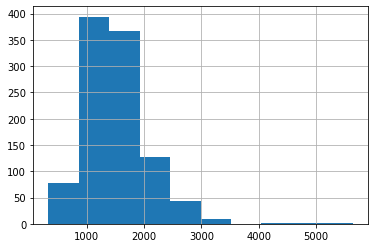

In [21]:
X_train['GrLivArea'].hist()

In [52]:
X_train['GrLivArea'].value_counts()

864     14
1040    11
1456     9
848      8
1344     7
        ..
1400     1
3447     1
1396     1
1395     1
2046     1
Name: GrLivArea, Length: 673, dtype: int64

In [53]:
X_train['Fence'].value_counts()

MnPrv    108
GdPrv     45
GdWo      43
MnWw       4
Name: Fence, dtype: int64

In [54]:
X_train['BedroomAbvGr'].value_counts()

3    546
2    261
4    150
1     35
5     19
6      7
0      3
8      1
Name: BedroomAbvGr, dtype: int64

In [55]:
X_train['OverallCond'].value_counts()

5    562
6    183
7    136
8     59
4     42
3     19
9     16
2      4
1      1
Name: OverallCond, dtype: int64

### Create a Pipeline to apply transformers to the data

In [76]:
numeric_cols = ['GrLivArea', 'BedroomAbvGr', 'OverallCond']

ohe_cols = ['Fence', 'GarageFinish']

In [77]:
# Build the pipeline
numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])

ohe_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('ohe', ohe_transformer, ohe_cols),
    ],
)

### Fit the data to the preprocessor pipeline

In [78]:
preprocessed_data = preprocessor.fit_transform(X_train)

### Fit the Model with the preprocessed data

In [79]:
reg = LinearRegression()

reg.fit(preprocessed_data, y_train)

LinearRegression()

### Evaluate

#### Step 1: Transform the test data

In [80]:
preprocessed_test_data = preprocessor.transform(X_test)

In [81]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
147,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
676,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1304,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1372,60,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1427,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal
1096,70,RM,60.0,6882,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
637,190,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
753,60,RL,80.0,10240,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal


In [82]:
preprocessed_test_data

array([[0.32045968, 0.375     ],
       [0.27128862, 0.5       ],
       [0.25885456, 0.375     ],
       [0.33214017, 0.375     ],
       [0.23059533, 0.375     ],
       [0.22532027, 0.375     ],
       [0.39902035, 0.5       ],
       [0.12170309, 0.5       ],
       [0.14958553, 0.375     ],
       [0.14807837, 0.375     ],
       [0.146948  , 0.375     ],
       [0.2978523 , 0.375     ],
       [0.13903542, 0.25      ],
       [0.11567445, 0.375     ],
       [0.38036925, 0.5       ],
       [0.23850791, 0.25      ],
       [0.27072344, 0.375     ],
       [0.34419744, 0.375     ],
       [0.27015825, 0.375     ],
       [0.24058026, 0.5       ],
       [0.13564431, 0.375     ],
       [0.25056518, 0.5       ],
       [0.13300678, 0.25      ],
       [0.21627732, 0.375     ],
       [0.28372268, 0.375     ],
       [0.14374529, 0.375     ],
       [0.21834966, 0.375     ],
       [0.25263753, 0.375     ],
       [0.09984928, 0.375     ],
       [0.14751319, 0.375     ],
       [0.

#### Step 2: Score the test data - get the predictions

In [83]:
y_preds = reg.predict(preprocessed_test_data)

#### Evaluate the Model Performance

In [84]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds)

2259834407.4925866

In [85]:
from math import sqrt

sqrt(mean_squared_error(y_test, y_preds))

47537.71563182845